# Ecommerce Customers

# Problem Statement
A project with an Ecommerce company sells clothing online but they also have in-store style
and clothing advice sessions. Customers come in to the store, have sessions/meetings with
a personal stylist, then they can go home and order either on a mobile app or website for the
clothes they want. The company is trying to decide whether to focus their efforts on their
mobile app experience or their website. They have asked to help them figure it out.

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#for decision tree
from sklearn.tree import DecisionTreeRegressor
#for KNN
from sklearn.neighbors import KNeighborsRegressor
# fot gradiend boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
# for Random forest
from sklearn.ensemble import RandomForestRegressor
#for lasso regression model
from sklearn.linear_model import Ridge
#for Support Vector machine
from sklearn.svm import SVR

In [3]:
# import datasets
data=pd.read_csv('Ecommerce_Customers.csv')

In [4]:
data

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
data.shape

(500, 8)

In [6]:
data.size

4000

In [7]:
# Check null values in the dataset
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
# Summary statistics and info about the dataset
data.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
# Check Duplicates
data.duplicated().any()

False

In [11]:
# Drop the columns which is not required for prediction
data1 = data.drop(['Email','Address','Avatar'],axis=1)

In [12]:
data1

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


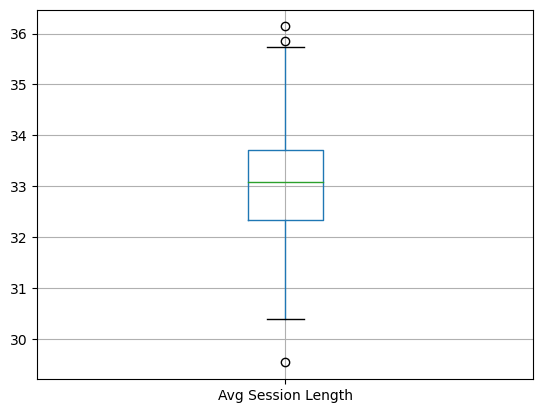

In [13]:
# Check outliers
data1.boxplot('Avg Session Length')
plt.show()

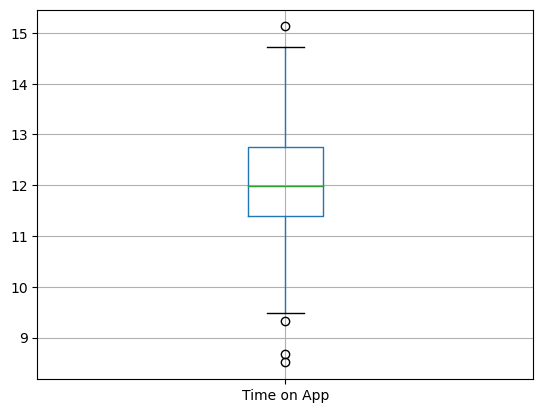

In [14]:
data1.boxplot('Time on App')
plt.show()

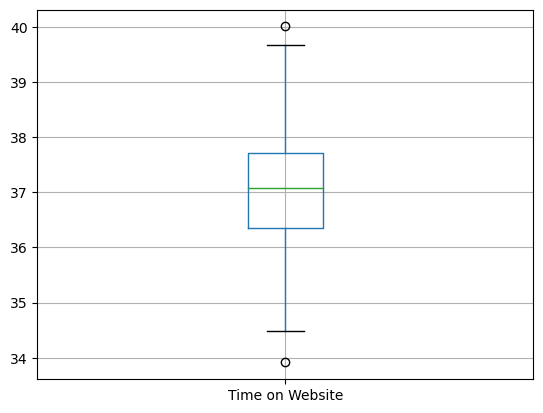

In [15]:
data1.boxplot('Time on Website')
plt.show()

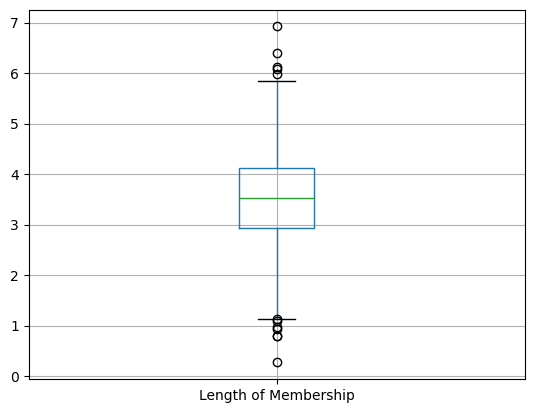

In [16]:
data1.boxplot('Length of Membership')
plt.show()

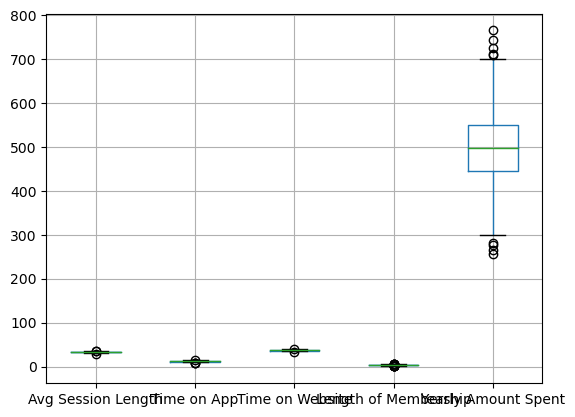

In [17]:
data1.boxplot()
plt.show()

In [18]:
# Function to remove outliers using IQR method
def remove_outliers(data1):
    for col in data1.select_dtypes(include='number').columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data1[col].quantile(0.25)
        Q3 = data1[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_extreme = Q1 - 1.5 * IQR
        upper_extreme = Q3 + 1.5 * IQR
        
        # Remove outliers
        data1 = data1[(data1[col] > lower_extreme) & (data1[col] < upper_extreme)]
    
    return data1

In [19]:
# Remove outliers from all columns
new_data = remove_outliers(data1)
print(new_data)

     Avg Session Length  Time on App  Time on Website  Length of Membership  \
0             34.497268    12.655651        39.577668              4.082621   
1             31.926272    11.109461        37.268959              2.664034   
2             33.000915    11.330278        37.110597              4.104543   
3             34.305557    13.717514        36.721283              3.120179   
4             33.330673    12.795189        37.536653              4.446308   
..                  ...          ...              ...                   ...   
495           33.237660    13.566160        36.417985              3.746573   
496           34.702529    11.695736        37.190268              3.576526   
497           32.646777    11.499409        38.332576              4.958264   
498           33.322501    12.391423        36.840086              2.336485   
499           33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054

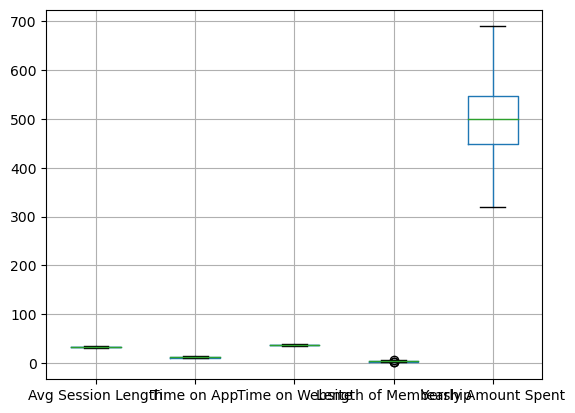

In [20]:
# Visualization after removed outliers
new_data.boxplot()
plt.show()

In [21]:
# Compute the correlation matrix
corr_matrix=new_data.corr()
corr_matrix

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.039729,-0.007856,0.000236,0.331589
Time on App,-0.039729,1.000000,0.065066,-0.055699,0.480231
Time on Website,-0.007856,0.065066,1.000000,-0.053180,-0.005199
Length of Membership,0.000236,-0.055699,-0.053180,1.000000,0.761956
Yearly Amount Spent,0.331589,0.480231,-0.005199,0.761956,1.000000


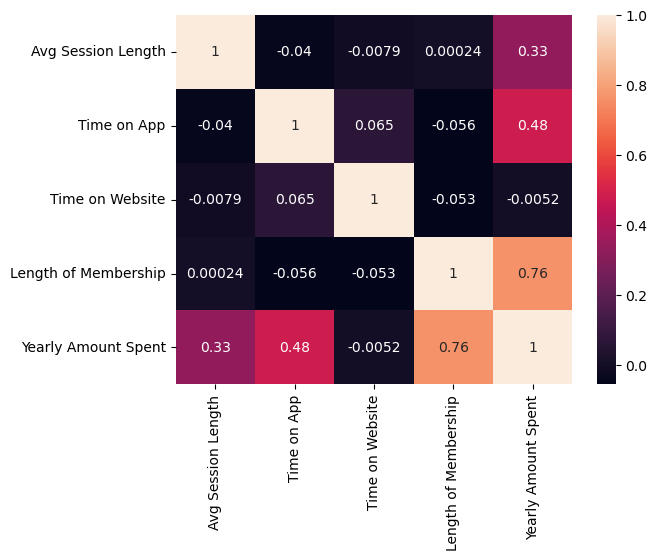

In [22]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Visualization 

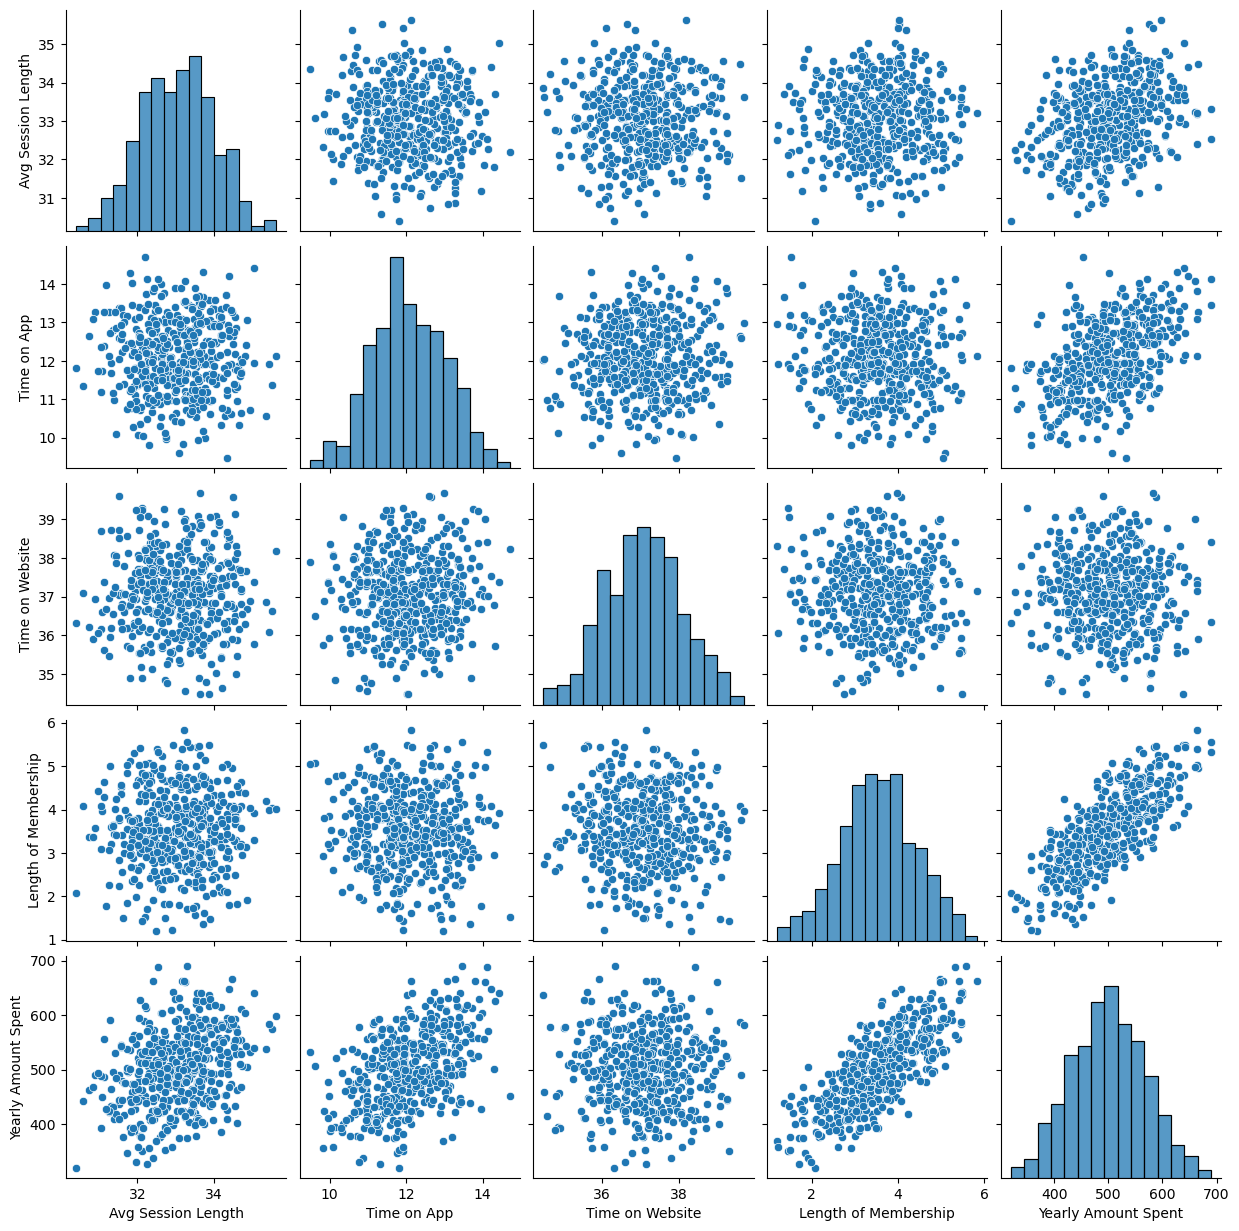

In [23]:
# Pairplot for a subset of variables
sns.pairplot(new_data)
plt.show()

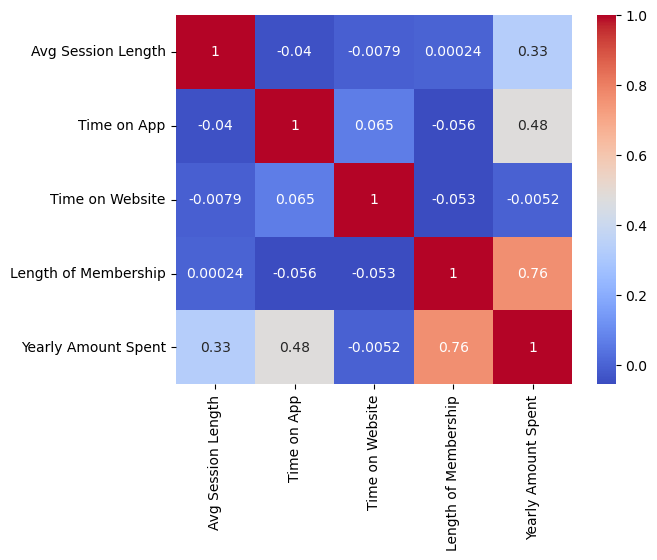

In [24]:
# Correlation heatmap
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.show()

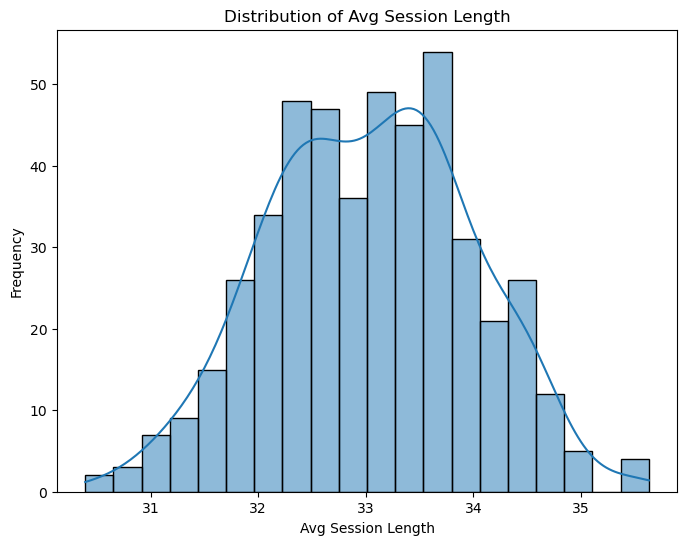

In [25]:
# Univariate Analysis
# Histogram of Avg Session Length
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Avg Session Length'], bins=20, kde=True)
plt.title('Distribution of Avg Session Length')
plt.xlabel('Avg Session Length')
plt.ylabel('Frequency')
plt.show()

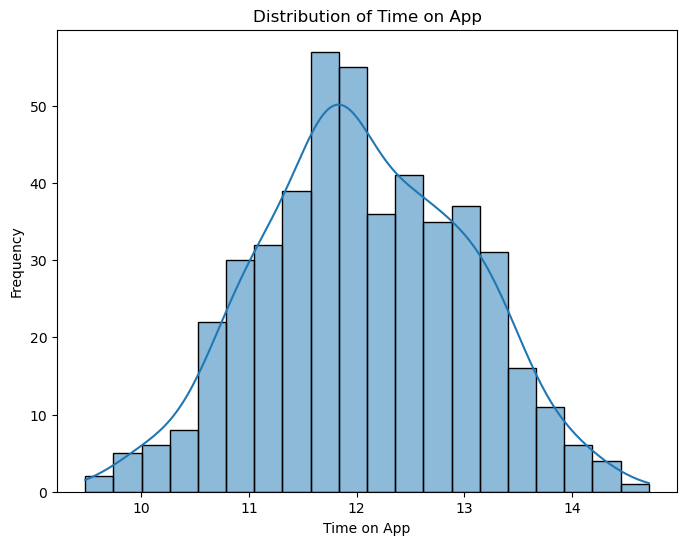

In [26]:
# Histogram of Time on App
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Time on App'], bins=20, kde=True)
plt.title('Distribution of Time on App')
plt.xlabel('Time on App')
plt.ylabel('Frequency')
plt.show()

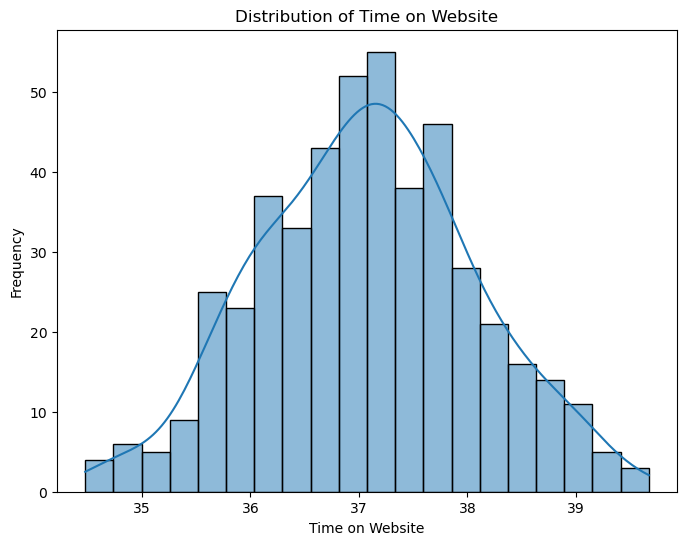

In [27]:
# Histogram of Time on Website
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Time on Website'], bins=20, kde=True)
plt.title('Distribution of Time on Website')
plt.xlabel('Time on Website')
plt.ylabel('Frequency')
plt.show()

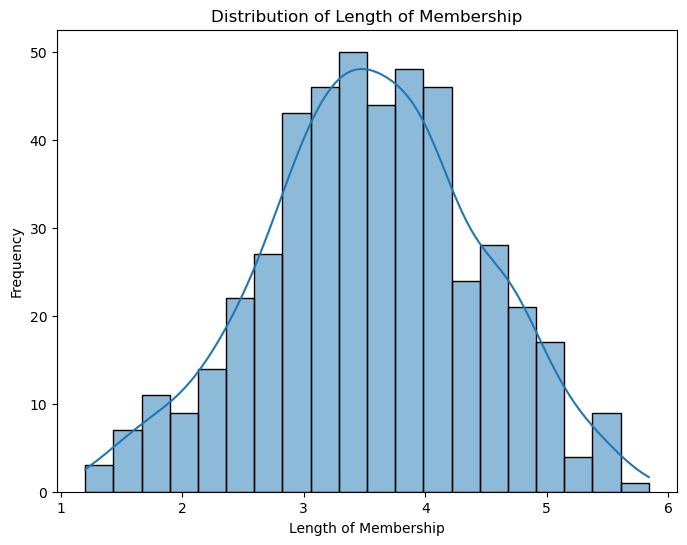

In [28]:
# Histogram of Length of Membership
plt.figure(figsize=(8, 6))
sns.histplot(new_data['Length of Membership'], bins=20, kde=True)
plt.title('Distribution of Length of Membership')
plt.xlabel('Length of Membership')
plt.ylabel('Frequency')
plt.show()

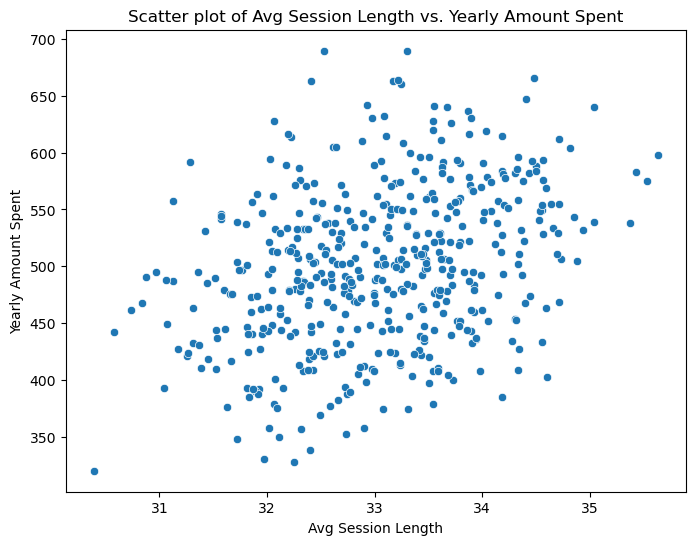

In [29]:
# Scatter plot of Avg Session Length vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Avg Session Length', y='Yearly Amount Spent')
plt.title('Scatter plot of Avg Session Length vs. Yearly Amount Spent')
plt.xlabel('Avg Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

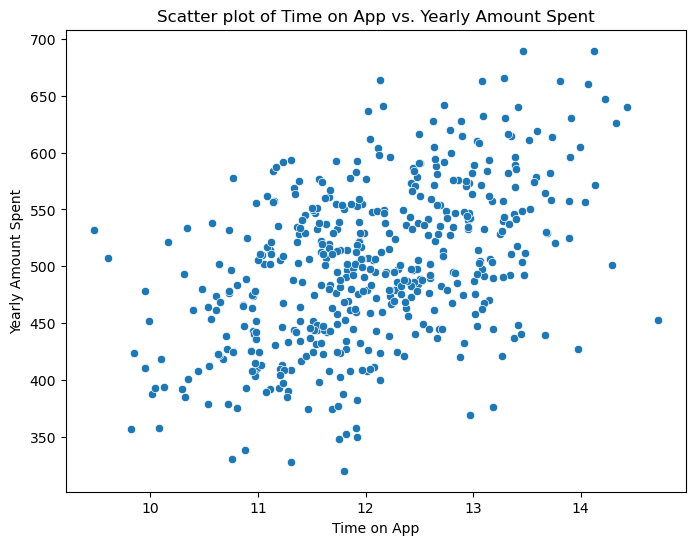

In [30]:
# Scatter plot of Time on App vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Time on App', y='Yearly Amount Spent')
plt.title('Scatter plot of Time on App vs. Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

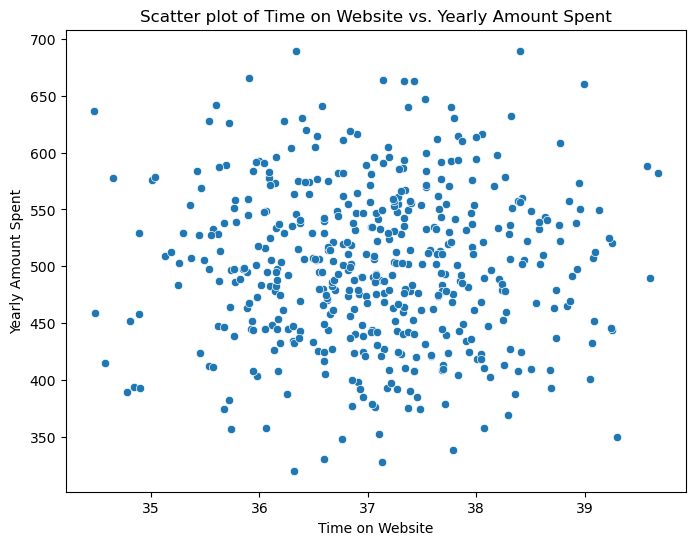

In [31]:
# Scatter plot of Time on Website vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Time on Website', y='Yearly Amount Spent')
plt.title('Scatter plot of Time on Website vs. Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.show()

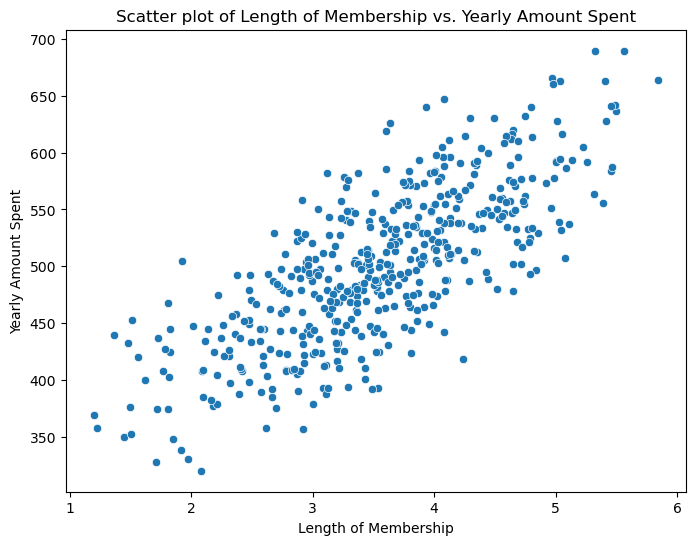

In [32]:
# Scatter plot of Length of Membership vs. Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Length of Membership', y='Yearly Amount Spent')
plt.title('Scatter plot of Length of Membership vs. Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

# Auto EDA

In [33]:
# Generate the EDA report using sweetviz
import sweetviz as sv

In [34]:
report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [35]:
report.show_html('sweetviz_report.html')

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Processing

In [36]:
# Split the data into features and target

In [37]:
x =new_data.iloc[: , 0:4]
y =new_data.iloc[:, 4]

In [38]:
# Import train_test_split to split the datas
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

In [40]:
x_train.shape

(142, 4)

In [41]:
x_test.shape

(332, 4)

In [42]:
y_train.shape

(142,)

In [43]:
y_test.shape

(332,)

In [44]:
train_accuracy = []
test_accuracy = []

#  Model Building

# MODEL 1:  Linear Regression

In [45]:
print("Linear Regression Model:")
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

Linear Regression Model:


LinearRegression()

In [46]:
#train and test predictions
y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

### MODEL EVALUATION

In [47]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_accuracy.append(r2_train)
test_accuracy.append(r2_test)

In [48]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

Training Set Performance:
-------------------------
Mean Squared Error: 95.1827298420211
R-squared Score: 0.9789468289892574


In [49]:
print("Test Set Performance:")
print('---------------------')
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)

Test Set Performance:
---------------------
Mean Squared Error: 104.62338637629368
R-squared Score: 0.9782324585747469


### Cross validation

In [50]:
from sklearn.neighbors import KNeighborsRegressor
linear_model = KNeighborsRegressor(n_neighbors=13)

In [51]:
training_error = []
test_error = []

In [52]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)
    linear_model.fit(x_train,y_train)
    y_pred_train = linear_model.predict(x_train)
    y_pred_test  = linear_model.predict(x_test)
    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Cross validation training Error:",np.mean(training_error).round(2))
print("Cross validation test Error:",np.mean(test_error).round(2))
print("variance:",(np.mean(test_error)-np.mean(training_error)).round(2))

Cross validation training Error: 23.15
Cross validation test Error: 20.99
variance: -2.16


# MODEL 2: Ridge Regression Model

In [53]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(x_train,y_train)

Ridge()

In [54]:
# test prediction and traning prediction
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)


### Model Evaluation

In [55]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_accuracy.append(r2_train)
test_accuracy.append(r2_test)

In [56]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

Training Set Performance:
-------------------------
Mean Squared Error: 102.57853706017512
R-squared Score: 0.9794312937397825


In [57]:
print("\nTest Set Performance:")
print('-----------------------')
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)


Test Set Performance:
-----------------------
Mean Squared Error: 96.00373694239926
R-squared Score: 0.9765446725695566


# MODEL 3: Decision Tree Model

In [58]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [59]:
# test prediction and training prediction
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

### Model Evaluation

In [60]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_accuracy.append(r2_train)
test_accuracy.append(r2_test)

In [ ]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

In [ ]:
print("\nTest Set Performance:")
print('-----------------------')
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)

### Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
gb_model = KNeighborsRegressor(n_neighbors=13)

In [ ]:
training_error = []
test_error = []

In [ ]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    gb_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test  = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Cross validation training Error:",np.mean(training_error).round(2))
print("Cross validation test Error:",np.mean(test_error).round(2))
print("variance:",(np.mean(test_error)-np.mean(training_error)).round(2))

# Model 4: Random Forest Model

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 100, max_samples=0.8, max_features=4, random_state = 42)
rf_model.fit(x_train,y_train)

In [ ]:
# test prediction and traning prediction
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

### Model Evaluation

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
train_accuracy.append(r2_train)
test_accuracy.append(r2_test)

In [ ]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

In [ ]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

# Model 5: Gradient Boosting Regressor Model

In [ ]:
print("\nGradient Boosting Regressor Model:")
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)

In [ ]:
# test prediction and traning prediction
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)

### Model Evaluation

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_accuracy.append(r2_train)
test_accuracy.append(r2_test)

In [ ]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

In [ ]:
print("\nTest Set Performance:")
print('------------------------')
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)

### Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
gb_model = KNeighborsRegressor(n_neighbors=13)

In [ ]:
training_error = []
test_error = []

In [ ]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    gb_model.fit(X_train,Y_train)
    Y_pred_train = gb_model.predict(X_train)
    Y_pred_test  = gb_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Cross validation training Error:",np.mean(training_error).round(2))
print("Cross validation test Error:",np.mean(test_error).round(2))
print("variance:",(np.mean(test_error)-np.mean(training_error)).round(2))

# Model 6: K - NEAREST NEIGHBOR REGRESSOR MODEL

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
sdata=std.fit_transform(new_data)

In [ ]:
# convert array into dataframes 
std_data=pd.DataFrame(sdata,columns=new_data.columns)

In [ ]:
sx =std_data.iloc[:, 0:4]
sy =std_data.iloc[:, 4]
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(sx, sy, test_size=0.2, random_state=42)

In [ ]:
# Create and train the KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K) here
knn_model.fit(X_train, Y_train)

In [ ]:
# test prediction and traning prediction
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

### Model Evaluation

In [ ]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
train_accuracy.append(r2_train)
test_accuracy.append(r2_test)

In [ ]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

In [ ]:
print("\nTest Set Performance:")
print('-----------------------')
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)

# Model 7 - Support Vector Machine Model

In [ ]:
svm_model = SVR(kernel='linear', C = 1.0)
svm_model.fit(X_train,Y_train)

In [ ]:
# test prediction and traning prediction
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

## Model Evaluation

In [ ]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
train_accuracy.append(r2_train)
test_accuracy.append(r2_test)

In [ ]:
print("Training Set Performance:")
print('-------------------------')
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

In [ ]:
print("\nTest Set Performance:")
print('-----------------------')
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-darkgrid')
plt.bar(range(1,8),train_accuracy,color="blue")
plt.plot(range(1,8),train_accuracy,color="black")
plt.title('Training Accuracy',size =25)
plt.ylim(0.8,1)
plt.xticks(range(1,8))
plt.xlabel("Model",size=20)
plt.ylabel("Accuracy",size=20)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Testing Accuracy',size = 25)
plt.bar(range(1,8),test_accuracy,color="blue")
plt.plot(range(1,8),test_accuracy,color="black")
plt.ylim(0.8,1)
plt.xticks(range(1,8))
plt.xlabel("Model",size=20)
plt.ylabel("Accuracy",size=20)
plt.show()

## Auto ML

In [ ]:
from tpot import TPOTRegressor

In [ ]:
data=pd.read_csv('Ecommerce_Customers.csv')

In [ ]:
data

In [ ]:
data.head()

In [ ]:
Features = data.drop(['Yearly Amount Spent', 'Email', 'Address', 'Avatar'], axis=1) 
Target = data['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [ ]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

In [ ]:
print("The cross-validated R^2 score is:", tpot.score(X_test, y_test))
tpot.export('tpot_ecommerce_pipeline.py')